### Quickstart for TARDIS ###

After the [installation](../installation.rst) start a jupyter server executing `jupyter notebook` on the commandline in a directory that contains the configuration file (in our example `tardis_example.yml`, which can be downloaded [here](https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml)). The atomic database (for more info refer to [atomic data](../atomic/atomic_data.rst) ) and a configuration file (more info at [configuration](../configuration/index.rst) ). You can obtain a copy of the atomic database from the
(https://github.com/tardis-sn/tardis-refdata) repository
(`atom_data` subfolder). We recommended to use the
`kurucz_cd23_chianti_H_He.h5` dataset (which is auto-downloaded in the second cell already).

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


#### Downloading the atomic data ####

In [2]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:37)


#### Running the simulation (long output) ####

In [3]:
#TARDIS now uses the data in the data repo
sim = run_tardis('tardis_example.yml')

[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /Users/wkerzend/miniconda/envs/tardis3/lib/python3.6/site-packages/astropy/units/quantity.py:1067: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError.
  AstropyDeprecationWarning)
 (warnings.py:99)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/

[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10659.382763  11507.437689  0.433573  0.499441
	5      11038.244897  11634.568776  0.158494  0.197953
	10     10790.696726  11418.594559  0.099660  0.124085
	15     10450.666394  10999.619473  0.074550  0.094676

 (base.py:348)
[tardis.simulation.base][INFO   ]  t_inner 11261.489 K -- next t_inner 10069.444 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 7/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.49858e+42 erg / s Luminosity absorbed = 2.69247e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      11507.437689  10679.650246  0.499441  0.431088
	5      11634.568776  11048.

[tardis.simulation.base][INFO   ]  Starting iteration 16/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.23781e+43 erg / s Luminosity absorbed = 4.07435e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10712.622749  11352.158138  0.455660  0.500754
	5      11125.894032  11644.968350  0.164091  0.185289
	10     10816.390451  11320.695930  0.104037  0.119195
	15     10421.687097  10965.228363  0.080401  0.089940

 (base.py:348)
[tardis.simulation.base][INFO   ]  t_inner 11087.666 K -- next t_inner 10256.946 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 17/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 9.18956e+42 erg / s Luminosity absorbed = 2.86249e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[

#### Plotting the Spectrum ####

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


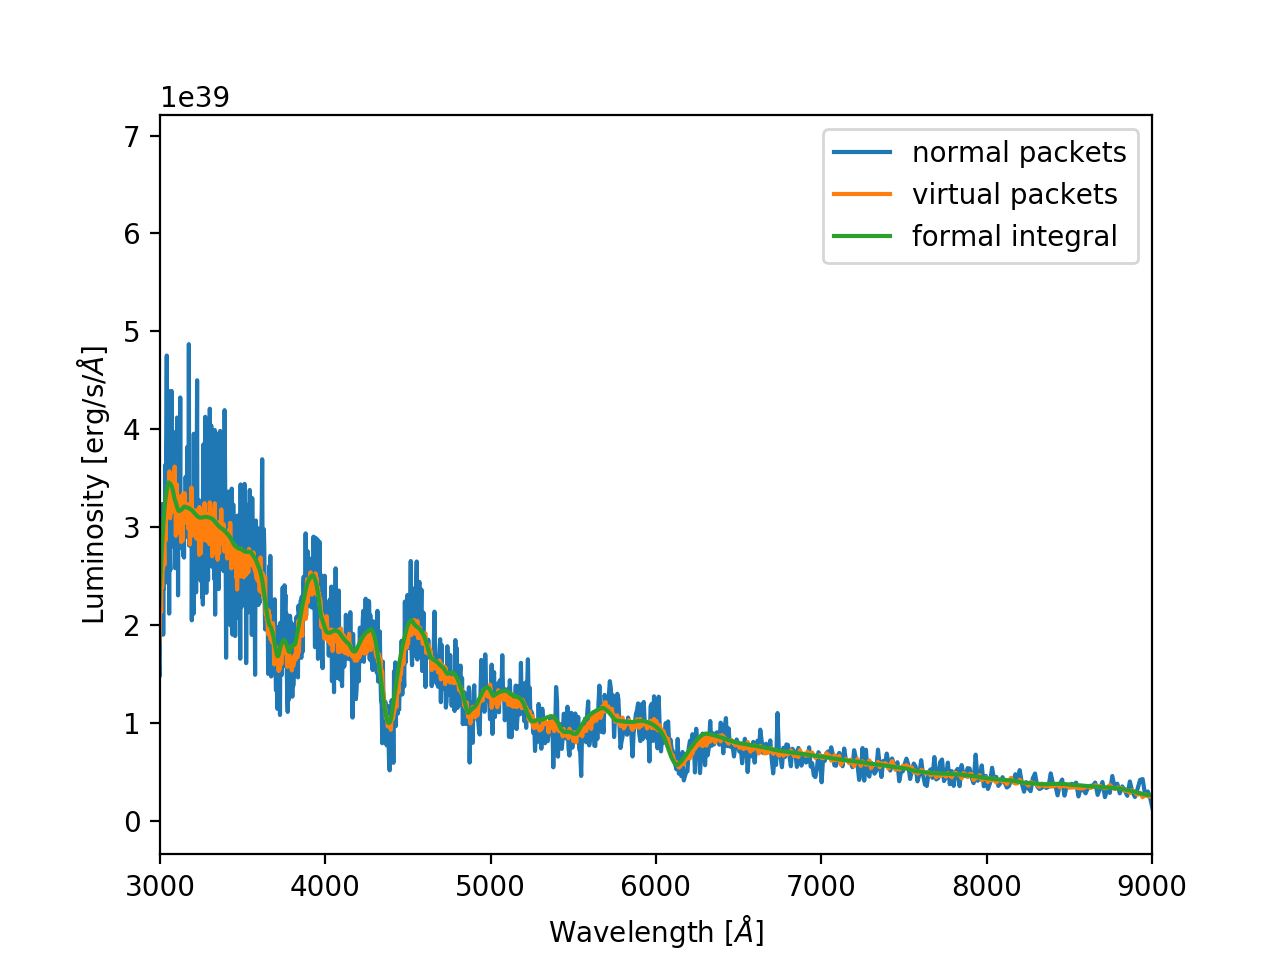

(3000, 9000)

In [9]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)